## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

## Chapter-007-011-statsmodels-01

In [1]:
import numpy as np
from scipy.stats import norm, beta
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from statsmodels.regression.quantile_regression import QuantReg
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.distributions.mixture_rvs import mixture_rvs


import matplotlib.pyplot as plt

## Data Set 1

In [2]:
dat1 = sm.datasets.get_rdataset("Guerry", "HistData").data

In [3]:
dat1.shape

(86, 23)

In [4]:
dat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 23 columns):
dept               86 non-null int64
Region             85 non-null object
Department         86 non-null object
Crime_pers         86 non-null int64
Crime_prop         86 non-null int64
Literacy           86 non-null int64
Donations          86 non-null int64
Infants            86 non-null int64
Suicides           86 non-null int64
MainCity           86 non-null object
Wealth             86 non-null int64
Commerce           86 non-null int64
Clergy             86 non-null int64
Crime_parents      86 non-null int64
Infanticide        86 non-null int64
Donation_clergy    86 non-null int64
Lottery            86 non-null int64
Desertion          86 non-null int64
Instruction        86 non-null int64
Prostitutes        86 non-null int64
Distance           86 non-null float64
Area               86 non-null int64
Pop1831            86 non-null float64
dtypes: float64(2), int64(18), object(3

In [5]:
dat1.columns

Index(['dept', 'Region', 'Department', 'Crime_pers', 'Crime_prop', 'Literacy',
       'Donations', 'Infants', 'Suicides', 'MainCity', 'Wealth', 'Commerce',
       'Clergy', 'Crime_parents', 'Infanticide', 'Donation_clergy', 'Lottery',
       'Desertion', 'Instruction', 'Prostitutes', 'Distance', 'Area',
       'Pop1831'],
      dtype='object')

In [6]:
results0101 = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', 
                  data=dat1
                 ).fit()

print(results0101.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           1.90e-08
Time:                        16:24:21   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [7]:
results0102 = smf.ols('Lottery ~ Literacy + Wealth + Region', 
                  data=dat1
                 ).fit()

print(results0102.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           1.07e-05
Time:                        16:24:21   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

## Data Set 2

In [8]:
dat2 = sm.datasets.longley.load()

C:\Users\AndreVermeulen\AppData\Local\conda\conda\envs\py36\lib\site-packages\statsmodels\datasets\utils.py:100: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exog = np.column_stack(data[field] for field in exog_name)


In [9]:
results0201 = smf.GLM(dat2.endog, dat2.exog, family=sm.families.Binomial()).fit()

print(results0201.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   16
Model:                            GLM   Df Residuals:                       10
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 21 Apr 2019   Deviance:                   9.8512e+07
Time:                        16:24:21   Pearson chi2:                 3.08e+26
No. Iterations:                     2   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -3.58e+17   1.83e+07  -1.96e+10      0.000   -3.58e+17   -3.58e+17
x2          4.801e+14   4260.479   1.13e+11      0.0

C:\Users\AndreVermeulen\AppData\Local\conda\conda\envs\py36\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\AndreVermeulen\AppData\Local\conda\conda\envs\py36\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\AndreVermeulen\AppData\Local\conda\conda\envs\py36\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: invalid value encountered in add
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\AndreVermeulen\AppData\Local\conda\conda\envs\py36\lib\site-packages\statsmodels\genmod\families\family.py:933: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights


## Data Set 3

In [10]:
dat3 = sm.datasets.longley.load_pandas().data

In [11]:
dat3.shape

(16, 7)

In [12]:
dat3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
TOTEMP     16 non-null float64
GNPDEFL    16 non-null float64
GNP        16 non-null float64
UNEMP      16 non-null float64
ARMED      16 non-null float64
POP        16 non-null float64
YEAR       16 non-null float64
dtypes: float64(7)
memory usage: 976.0 bytes


In [13]:
results0301 = smf.ols('UNEMP ~ ARMED + POP + YEAR', 
                  data=dat3
                 ).fit()

print(results0301.summary())

C:\Users\AndreVermeulen\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                  UNEMP   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     9.419
Date:                Sun, 21 Apr 2019   Prob (F-statistic):            0.00177
Time:                        16:24:21   Log-Likelihood:                -121.94
No. Observations:                  16   AIC:                             251.9
Df Residuals:                      12   BIC:                             255.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.671e+05   6.27e+05     -0.905      0.3

## Data Set 4

In [14]:
dat4 = sm.datasets.engel.load_pandas().data

In [15]:
dat4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
income     235 non-null float64
foodexp    235 non-null float64
dtypes: float64(2)
memory usage: 3.8 KB


In [16]:
model4 = smf.quantreg('foodexp ~ income', dat4)
res = model4.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                foodexp   Pseudo R-squared:               0.6206
Model:                       QuantReg   Bandwidth:                       64.51
Method:                 Least Squares   Sparsity:                        209.3
Date:                Sun, 21 Apr 2019   No. Observations:                  235
Time:                        16:24:22   Df Residuals:                      233
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.4823     14.634      5.568      0.000      52.649     110.315
income         0.5602      0.013     42.516      0.000       0.534       0.586

The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


In [17]:
quantiles = np.arange(.05, .96, .1)

def fit_model(q):
    res = model4.fit(q=q)
    return [q, res.params['Intercept'], res.params['income']] + \
            res.conf_int().loc['income'].tolist()
    
models = [fit_model(x) for x in quantiles]

models = pd.DataFrame(models, columns=['q', 'a', 'b','lb','ub'])

ols = smf.ols('foodexp ~ income', dat4).fit()

ols_ci = ols.conf_int().loc['income'].tolist()

ols = dict(a = ols.params['Intercept'],
           b = ols.params['income'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)

print(ols)

      q           a         b        lb        ub
0  0.05  124.880096  0.343361  0.268632  0.418090
1  0.15  111.693659  0.423708  0.382780  0.464636
2  0.25   95.483539  0.474103  0.439900  0.508306
3  0.35  105.841294  0.488901  0.457759  0.520043
4  0.45   81.083647  0.552428  0.525021  0.579835
5  0.55   89.661370  0.565601  0.540955  0.590247
6  0.65   74.033435  0.604576  0.582169  0.626982
7  0.75   62.396584  0.644014  0.622411  0.665617
8  0.85   52.272216  0.677603  0.657383  0.697823
9  0.95   64.103964  0.709069  0.687831  0.730306
{'a': 147.47538852370565, 'b': 0.48517842367692365, 'lb': 0.4568738130184234, 'ub': 0.5134830343354239}


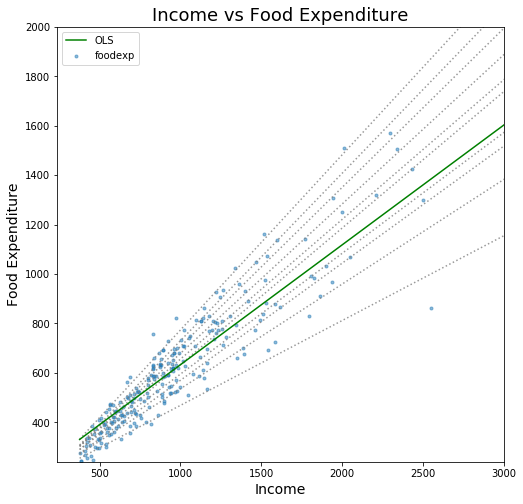

In [18]:
x = np.arange(dat4.income.min(), dat4.income.max(), 50)

get_y = lambda a, b: a + b * x

fig1, ax1 = plt.subplots(figsize=(8, 8))
plt.title('Income vs Food Expenditure', fontsize=18)

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax1.plot(x, y, linestyle='dotted', color='grey', alpha=0.8)
    
y = get_y(ols['a'], ols['b'])

ax1.plot(x, y, color='green', label='OLS')

ax1.scatter(dat4.income, dat4.foodexp, alpha=0.5, marker='.')

ax1.set_xlim((240, 3000))
ax1.set_ylim((240, 2000))
legend = ax1.legend()
ax1.set_xlabel('Income', fontsize=14)
ax1.set_ylabel('Food Expenditure', fontsize=14)
plt.show()

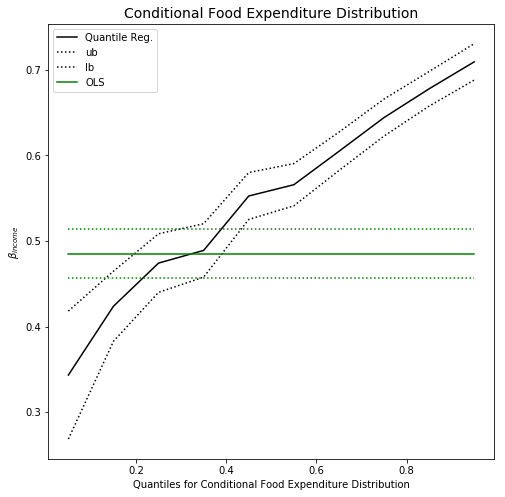

In [19]:
n = models.shape[0]

fig2, ax2 = plt.subplots(figsize=(8, 8))
plt.title('Conditional Food Expenditure Distribution', fontsize=14)

p01 = plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
p02 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p03 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p04 = plt.plot(models.q, [ols['b']] * n, color='green', label='OLS')
p05 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='green')
p06 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='green')
plt.ylabel(r'$\beta_{income}$')
plt.xlabel('Quantiles for Conditional Food Expenditure Distribution')
plt.legend()
plt.show()

## Data Set 5

In [20]:
np.random.seed(1968)

d=60
w=d/4
n=d/2
r=d/2

weight = pd.Series(np.repeat(['low', 'hi', 'low', 'hi'], w), name='weight')

nutrition = pd.Series(np.repeat(['lo_carb', 'hi_carb'], n), name='nutrition')

days = np.log(np.random.randint(1, r, size=d))

In [21]:
weight.shape

(60,)

In [22]:
nutrition.shape

(60,)

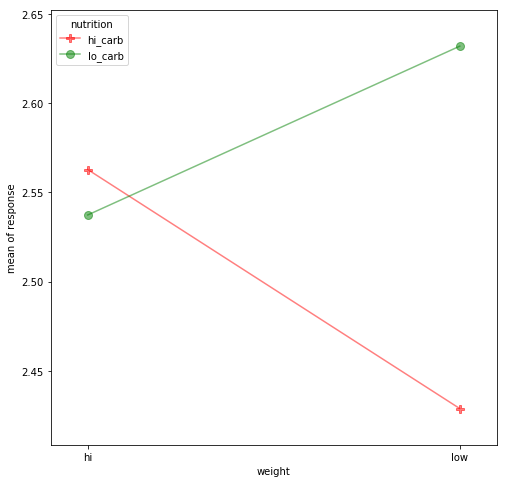

In [23]:
fig3, ax3 = plt.subplots(figsize=(8, 8))
fig3 = interaction_plot(x=weight, 
                        trace=nutrition, 
                        response=days,
                       colors=['red', 'green'], 
                        markers=['P', 'o'], 
                        ms=8, 
                        ax=ax3, 
                        alpha=0.5
                       )
plt.show()

## Data Set 6

In [24]:
np.random.seed(1968)

In [25]:
obs_dist01 = mixture_rvs([0.20,0.80], size=19680, dist=[norm, norm],
                kwargs = (dict(loc=-1,scale=0.3),dict(loc=1,scale=0.45)))

In [26]:
kde01 = sm.nonparametric.KDEUnivariate(obs_dist01)
kde01.fit()

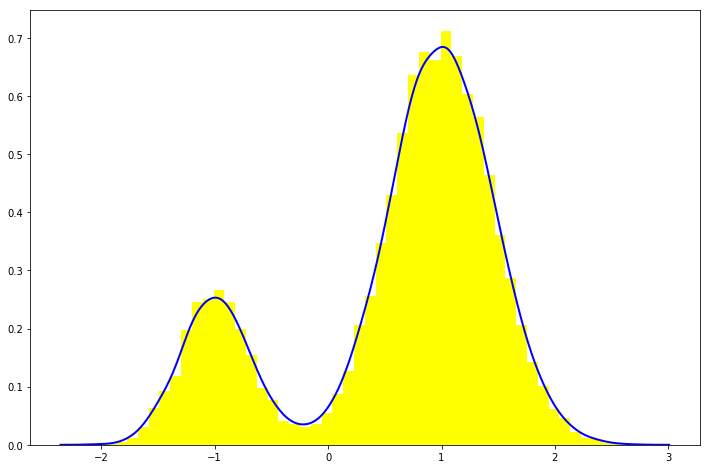

In [27]:
fig4 = plt.figure(figsize=(12,8))
ax4 = fig4.add_subplot(111)
ax4.hist(obs_dist01, bins=50, density=True, color='yellow')
ax4.plot(kde01.support, kde01.density, lw=2, color='blue')
plt.show()

In [28]:
obs_dist02 = mixture_rvs([0.20,0.80], size=19680, dist=[norm, beta],
            kwargs = (dict(loc=-1,scale=1.2),dict(loc=1,scale=1,args=(1,1.2))))

In [29]:
kde02 = sm.nonparametric.KDEUnivariate(obs_dist02)
kde02.fit()

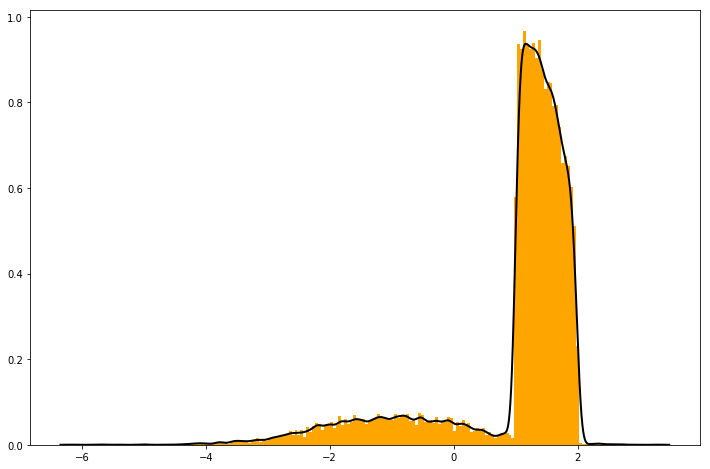

In [30]:
fig5 = plt.figure(figsize=(12,8))
ax5 = fig5.add_subplot(111)
ax5.hist(obs_dist02, bins=200, density=True, color='orange')
ax5.plot(kde02.support, kde02.density, lw=2, color='black')
plt.show()

In [31]:
obs_dist03 = mixture_rvs([.25,.75], size=1000, dist=[norm, norm],
                kwargs = (dict(loc=-1,scale=.5),dict(loc=1,scale=.5)))
kde03 = sm.nonparametric.KDEUnivariate(obs_dist03)
kde03.fit()

In [32]:
kde03.entropy

1.3056842299859268

In [33]:
kde03.evaluate(-1)

array([0.16685677])

### CDF

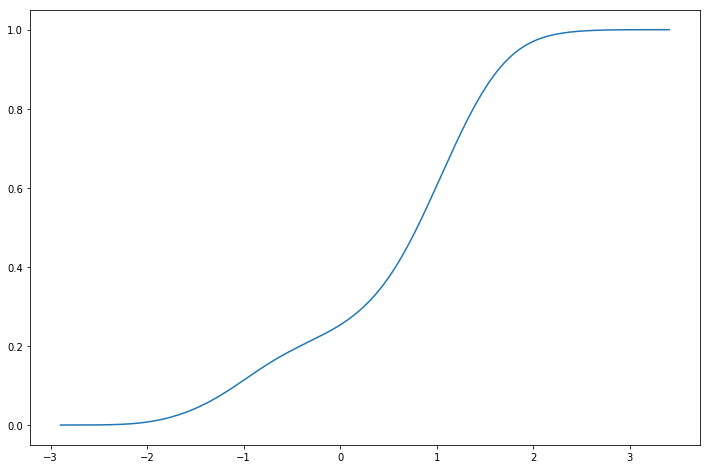

In [34]:
fig6 = plt.figure(figsize=(12,8))
ax6 = fig6.add_subplot(111)
ax6.plot(kde03.support, kde03.cdf)
plt.show()

### Cumulative Hazard Function

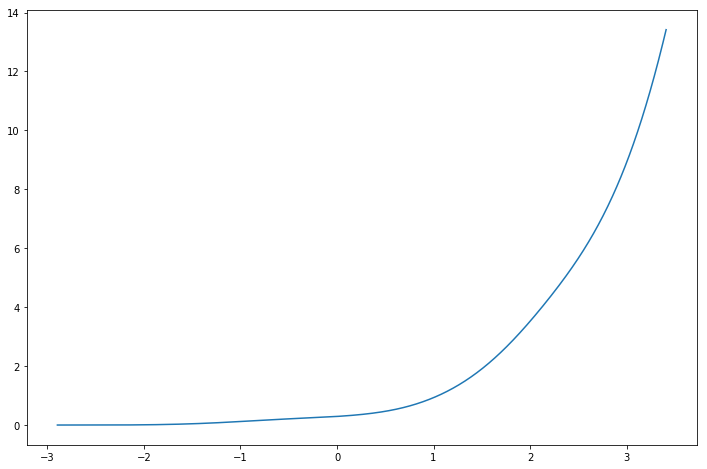

In [35]:
fig7 = plt.figure(figsize=(12,8))
ax7 = fig7.add_subplot(111)
ax7.plot(kde03.support, kde03.cumhazard)
plt.show()

### Inverse CDF

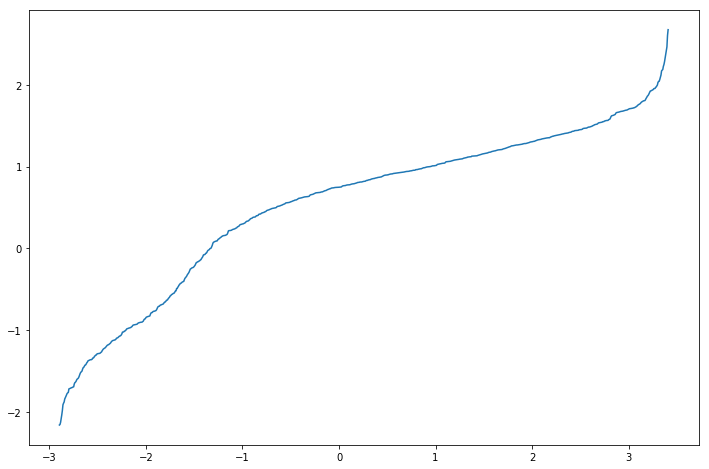

In [36]:
fig5 = plt.figure(figsize=(12,8))
ax5 = fig5.add_subplot(111)
ax5.plot(kde03.support, kde03.icdf)
plt.show()

### Survival Function

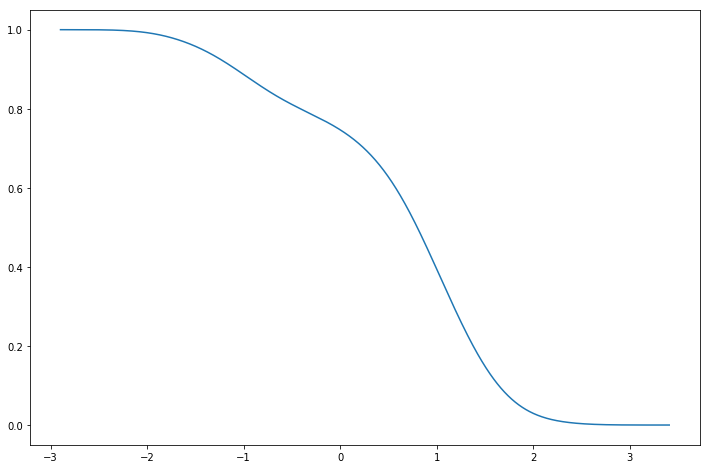

In [37]:
fig6 = plt.figure(figsize=(12,8))
ax6 = fig6.add_subplot(111)
ax6.plot(kde03.support, kde03.sf)
plt.show()

## Done

In [38]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-21 16:24:29.260625
